# Seleção de atributos via Fisher score

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import common as com
# import feature_selection

import sklearn.datasets as datasets
from sklearn.datasets import fetch_openml

x, y = datasets.load_iris(return_X_y=True); label_names = datasets.load_iris()['target_names']
x = x[:,1:3]

labels = [0, 1, 2]
colors = ['green', 'blue', 'red']

def plot_data(x, y, marker='o', legend=False, only_data=False):
    plt.rcParams.update({'font.size': com.fontsize})
    for i, label in enumerate(labels):
        plt.scatter(x[y == label,0], x[y == label,1],
                        s=10*com.markersize, marker=marker, color=colors[i])
    if legend:
        plt.legend()

def fisher_score(x, y):
    mean = np.mean(x, axis=0)
    classes = np.unique(y)
    sS = 0
    sD = 0
    Nk = []
    
    meanD = []
    varD = []
    
    for k in classes:
        elements = []
        s = 0
        for i in range(0, len(y)):
            if(y[i] == k):
                s += 1
                elements.append(x[i])
        meanD.append(np.mean(elements, axis=0))
        varD.append(np.var(elements, axis=0))
        Nk.append(s)
    
    for k in range(0, len(classes)):
        sS += (Nk[k] * ((meanD[k] - mean)**2))
        sD += (Nk[k] * varD[k])
    return sS/sD


Text(0.5, 1.0, 'Fisher scores: $x_1$:0.67, $x_2$:16.06')

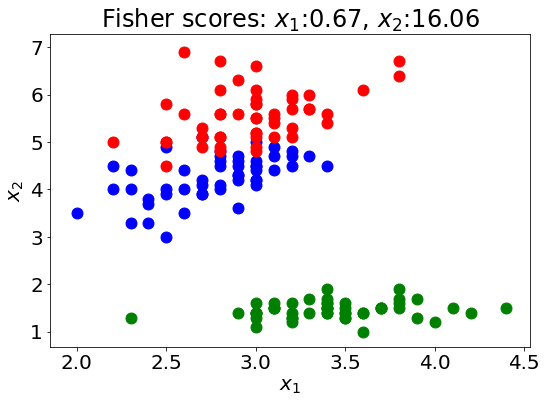

In [29]:
fisher_scores = fisher_score(x, y)

fig = plt.figure(figsize=com.figsize)
plot_data(x, y)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title(f'Fisher scores: $x_1$:{fisher_scores[0]:.2f}, $x_2$:{fisher_scores[1]:.2f}')
#plt.savefig('fisher_score.png', dpi=com.dpi)